In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.load_dataset("mpg")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
car_data = sns.load_dataset("mpg")

# Create a visual showing the relationship between horsepower and fuel economy.

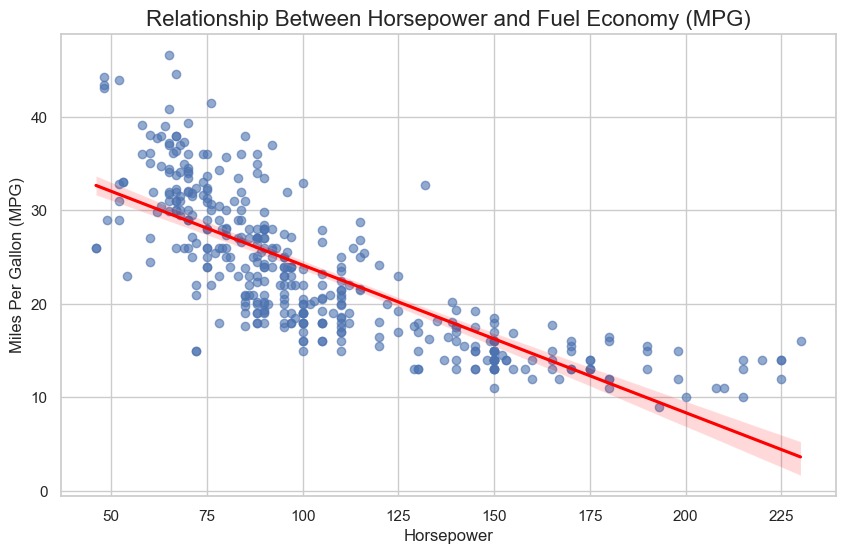

In [4]:
car_data = car_data.dropna(subset=['horsepower', 'mpg'])

# Plot style
sns.set(style="whitegrid")

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='horsepower', y='mpg', data=car_data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Relationship Between Horsepower and Fuel Economy (MPG)', fontsize=16)
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

## Scatter Plot: Horsepower vs Fuel Economy

#### Observation:
There is a clear **negative relationship** between horsepower and fuel economy. As horsepower increases, miles per gallon (MPG) decreases. This indicates that more powerful engines are generally less fuel-efficient.

# Create a table summarizing fuel economy by country of origin

In [5]:
fuel_summary = car_data.groupby('origin').agg(
    Count=('mpg', 'size'),
    Mean_MPG=('mpg', 'mean'),
    Max_MPG=('mpg', 'max'),
    Min_MPG=('mpg', 'min'),
    Median_MPG=('mpg', 'median')
).reset_index()

In [6]:
# Round numerical columns
fuel_summary[['Mean_MPG', 'Max_MPG', 'Min_MPG', 'Median_MPG']] = fuel_summary[
    ['Mean_MPG', 'Max_MPG', 'Min_MPG', 'Median_MPG']
].round(2)

# Rename origin column
fuel_summary.rename(columns={'origin': 'Country of Origin'}, inplace=True)

# Apply highlight to the max Mean_MPG
fuel_summary.style.highlight_max(subset=['Mean_MPG'], color='lightgreen')

,Country of Origin,Count,Mean_MPG,Max_MPG,Min_MPG,Median_MPG
0,europe,68,27.600000,44.300000,16.200000,26.000000
1,japan,79,30.450000,46.600000,18.000000,31.600000
2,usa,245,20.030000,39.000000,9.000000,18.500000


#### Observation:
Japanese cars have the highest average and median fuel economy (MPG), followed by European cars. U.S. cars have the lowest fuel efficiency and the widest range, suggesting more variability in design and engine performance.

# Create a visual showing how fuel economy has changed over time

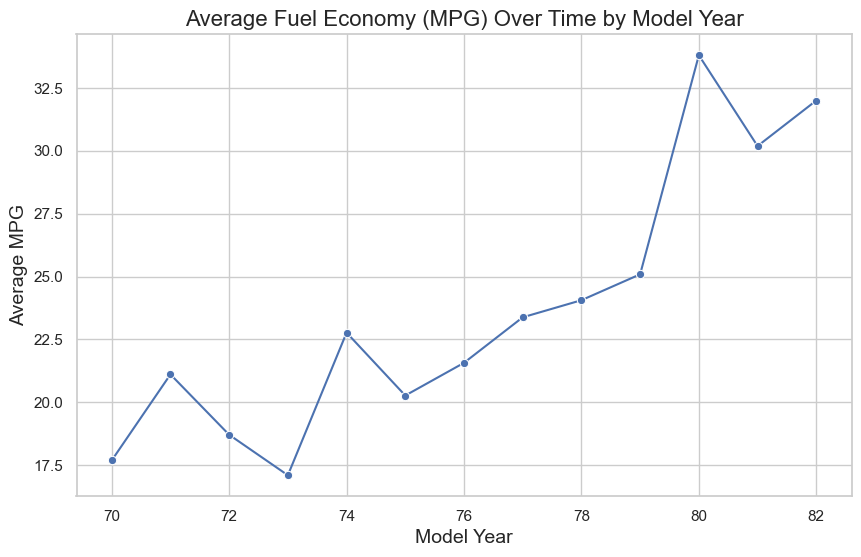

In [7]:
mpg_trend = car_data.groupby('model_year', as_index=False)['mpg'].mean()

# MPG values round for cleaner display
mpg_trend['mpg'] = mpg_trend['mpg'].round(2)

# Fuel economy plot trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='model_year', y='mpg', data=mpg_trend, marker='o')
plt.title('Average Fuel Economy (MPG) Over Time by Model Year', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Average MPG', fontsize=14)
plt.show()

## Line Chart: MPG Trends Over Time

#### Observation:
Fuel economy improved significantly between the early 1970s and early 1980s, likely due to the oil crisis and stricter fuel regulations. The trend shows a steady increase in average MPG over the years.

# Create other visuals or tables related to fuel economy.

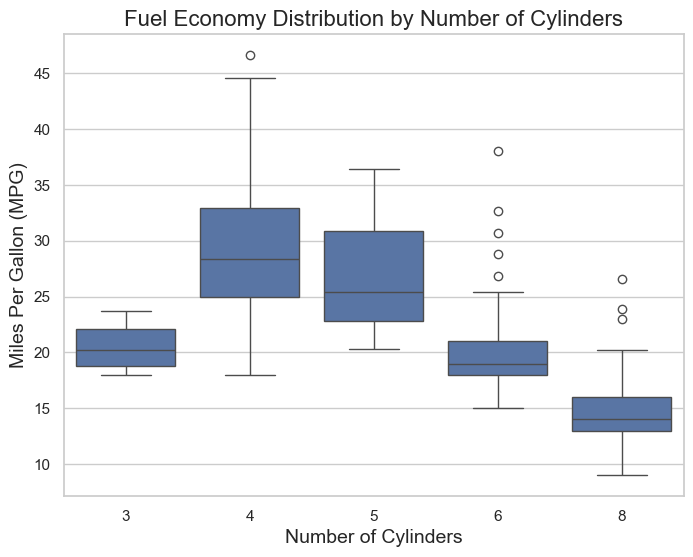

In [8]:
# MPG by Number of Cylinders
plt.figure(figsize=(8, 6))
sns.boxplot(x='cylinders', y='mpg', data=car_data)
plt.title('Fuel Economy Distribution by Number of Cylinders', fontsize=16)
plt.xlabel('Number of Cylinders', fontsize=14)
plt.ylabel('Miles Per Gallon (MPG)', fontsize=14)
plt.show()

## Boxplot: Fuel Efficiency by Number of Cylinders

#### Observation:
Cars with **fewer cylinders (4 or 3)** tend to have significantly **higher MPG**, while those with **6 or 8 cylinders** show lower fuel efficiency. The spread is also narrower for smaller engines, indicating consistency.

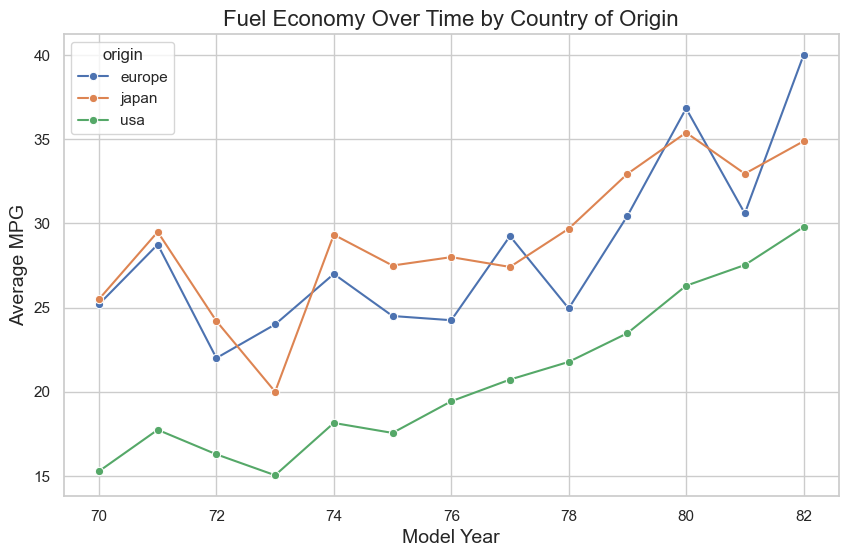

In [9]:
# Group by model_year and origin to get average MPG
mpg_by_year_origin = car_data.groupby(['model_year', 'origin'])['mpg'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='model_year', y='mpg', hue='origin', data=mpg_by_year_origin, marker='o')
plt.title('Fuel Economy Over Time by Country of Origin', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Average MPG', fontsize=14)
plt.show()

## Trend Comparison by Country of Origin

#### Observation:
All regions improved fuel economy over time, but **Japan consistently led in MPG** across all model years. This visual highlights how regional design priorities affected fuel efficiency trends.

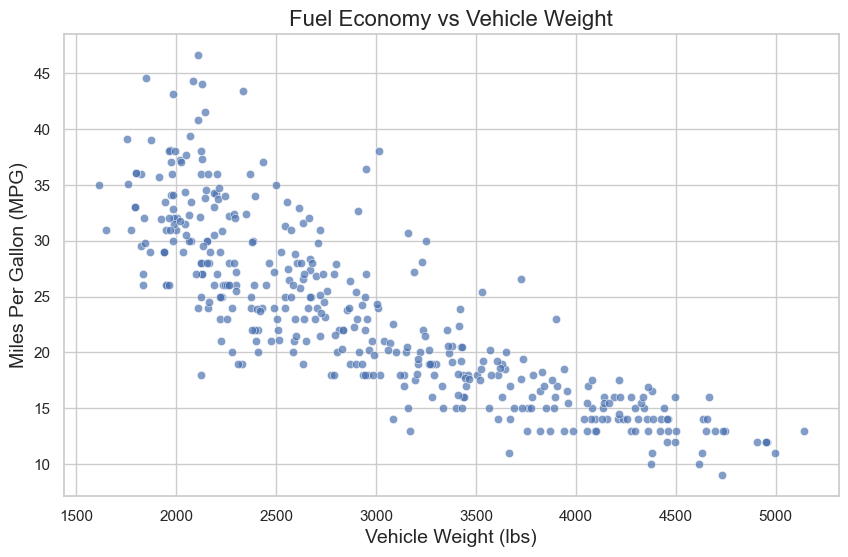

In [10]:
# MPG vs Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', data=car_data, alpha=0.7)
plt.title('Fuel Economy vs Vehicle Weight', fontsize=16)
plt.xlabel('Vehicle Weight (lbs)', fontsize=14)
plt.ylabel('Miles Per Gallon (MPG)', fontsize=14)
plt.show()

## Correlation Between Weight and MPG

#### Observation:
There is a strong **negative correlation between vehicle weight and fuel economy**. As vehicle weight increases, MPG tends to decrease. This suggests that lighter cars are generally more fuel-efficient than heavier ones.

## Summary & Key Insights

- Cars with higher horsepower and weight tend to have lower fuel economy.
- Japanese cars consistently lead in fuel efficiency, followed by European models.
- Fuel economy has improved over the years, especially post-1975, likely due to regulations.
- Vehicles with fewer cylinders (3 or 4) achieve significantly better MPG compared to larger engines.

This analysis demonstrates how engine specs, design origin, and vehicle weight influence fuel performance — key insights for manufacturers, buyers, and regulators.